In [4]:
from __future__ import print_function
%matplotlib inline

import pytraj as pt

import scipy
import scipy.cluster.hierarchy

In [5]:
# load data
traj = pt.iterload('data/tz2.ortho.nc', 'data/tz2.ortho.parm7')
traj

<pytraj.TrajectoryIterator, 10 frames, include:
<Topology: 5293 atoms, 1704 residues, 1692 mols, PBC with box type = ortho>>
           

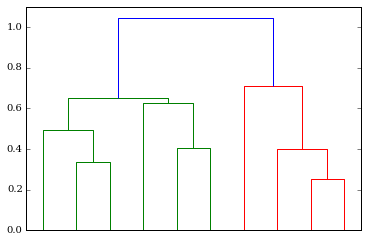

In [6]:

# calculate pairwise rmsd with `autoimage=True`
# generally we only need to cluster a subset of atoms.
# cluster for 'CA' atoms

distances = pt.pairwise_rmsd(traj(autoimage=True), mask='@CA')

# use `scipy` to perform clustering
linkage = scipy.cluster.hierarchy.ward(distances)

scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')
None

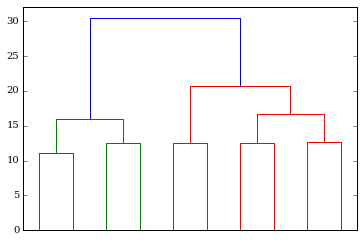

In [8]:
# cluster for all atoms but H

distances = pt.pairwise_rmsd(traj(autoimage=True), mask='!@H=')
linkage = scipy.cluster.hierarchy.ward(distances)
scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')
None